In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import copy

from sklearn.datasets import load_iris
iris = load_iris()

c:\Users\masa_\anaconda3\envs\suai\lib\site-packages\sklearn\datasets\base.py:242: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
c:\Users\masa_\anaconda3\envs\suai\lib\site-packages\sklearn\datasets\base.py:246: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

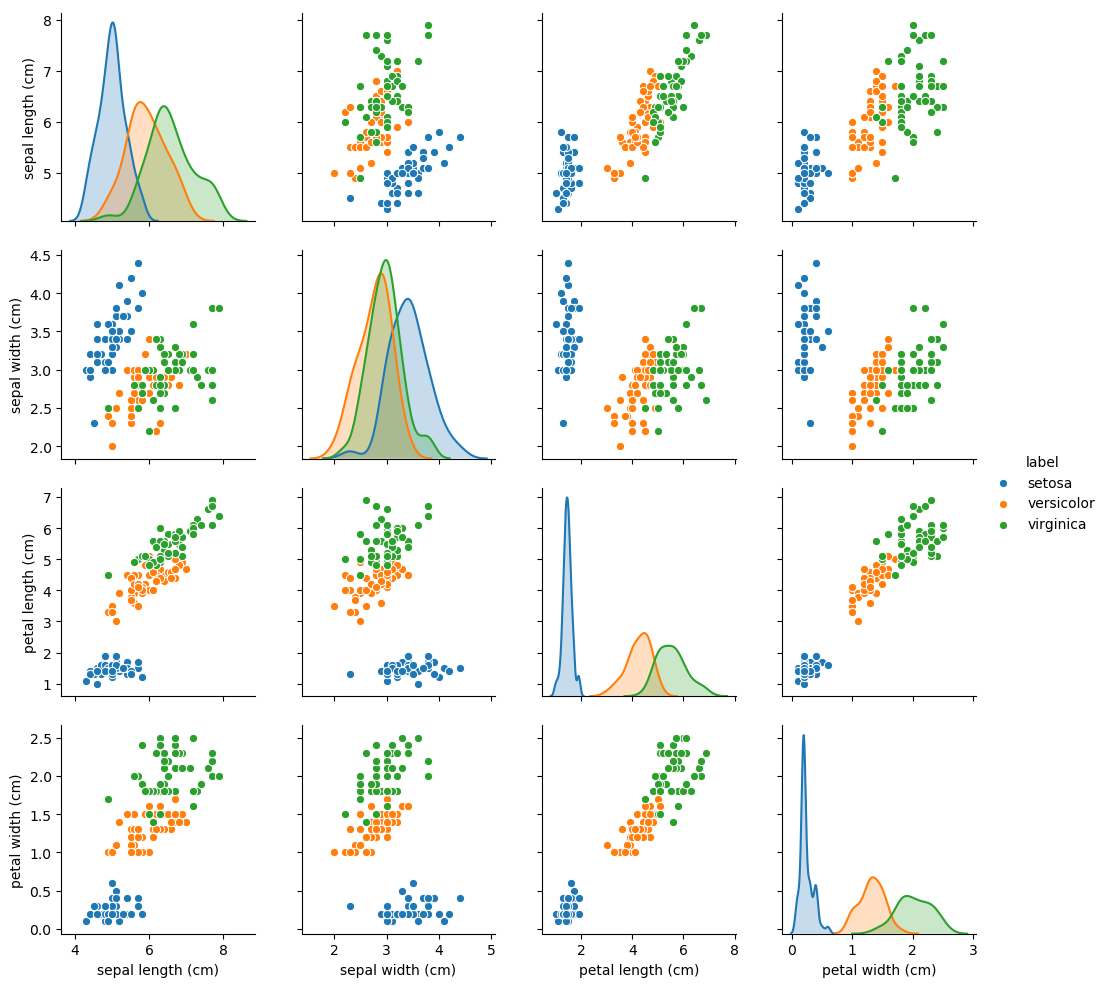

In [4]:
X, y = iris.data, iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['label'] = y
df['label'] = df['label'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})

sns.pairplot(df, hue='label')

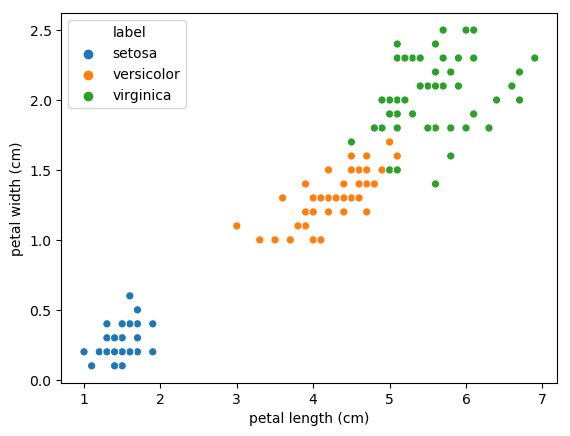

In [5]:
# petal width と petal lengthで多クラス分類
df.head()
df_simple = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='label')

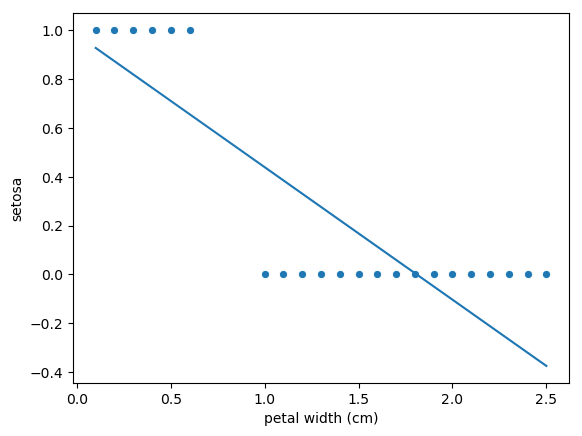

In [8]:
df_dummy = copy.copy(df)
df_dummy['setosa'] = df_dummy['label'].map({'setosa': 1, 'versicolor': 0, 'virginica': 0})
df_dummy['versicolor'] = df_dummy['label'].map({'setosa': 0, 'versicolor': 1, 'virginica': 0})
df_dummy['virginica'] = df_dummy['label'].map({'setosa': 0, 'versicolor': 0, 'virginica': 1})
df_dummy = df_dummy.drop('label', axis=1)

# display(df.head())
# display(df_dummy.head())

# 1. setosa or not
df_setosa = df_dummy.drop(['versicolor', 'virginica'], axis=1)

# まずは1変数
# prepare data
df_setosa_simple = df_setosa[['petal width (cm)', 'setosa']]
df_setosa_simple.head()
sns.scatterplot(x=df_setosa_simple['petal width (cm)'], y=df_setosa_simple['setosa'])
X = df_setosa_simple['petal width (cm)'].values.reshape(-1, 1)
y = df_setosa_simple['setosa'].values
type(X), type(y)

# まずはlinear regression
eta = 0.1
maxIter = 1000
i = 0

N = len(y)
b = 0
w = 0
norm = 1
# print(y, y_est, err)

while norm > 1e-5:
    y_est = w*X[:,0] + b
    err = 0.5 * np.sum((y-y_est)**2) / N
    dEdw = np.sum((y_est - y) * X[:,0]) / N
    dEdb = np.sum(y_est - y) / N
    norm = dEdw**2 + dEdb**2

    # update values
    w += - eta * dEdw
    b += - eta * dEdb
    i += 1
    
    if i > maxIter:
        break
# print(err)


y_est = w*X[:,0] + b
err = 0.5 * np.sum((y-y_est)**2) / N

sns.lineplot(X[:,0], y_est)
# print(y, y_est, err)

In [85]:
### 次にlogistic regression
eta = 0.01
maxIter = 1000
i = 0

N = len(y)
b = 0
w = -1
norm = 1


def sig(x):
    if x >= 0:
        y = 1 / (1 + np.exp(-x))
    if x < 0:
        y = np.exp(x) / (np.exp(x) + 1)
    
    return y

def diff_sig(x):
    dy = (1-sig(x)) * sig(x)
    return dy


# err: log-likelihood
def log_likelihood(y_true, y_proba):
    log_likelihood =  - np.sum(y_true*np.log(y_proba) + (1-y_true)*np.log(1-y_proba))
    return log_likelihood

y_est = w*X[:,0] + b
y_proba = np.array([sig(i) for i in y_est]) # sig(y_est)

err = log_likelihood(y, y_proba)

dEdw = np.sum((y/y_proba + (1-y)/(1-y_proba)) * np.array([diff_sig(i) for i in y_est]) * X[:,0])

print(err)
# , y_est, y_proba, dEdw

while norm > 1e-4:
    # print(i)
    
    y_est = w*X[:,0] + b
    y_proba = np.array([sig(i) for i in y_est])
    
    err = log_likelihood(y, y_proba)
    dEdw = np.sum((y/y_proba + (1-y)/(1-y_proba)) * np.array([diff_sig(i) for i in y_est]) * X[:,0])
    dEdb = np.sum((y/y_proba + (1-y)/(1-y_proba)) * np.array([diff_sig(i) for i in y_est]))
    norm = dEdw**2 + dEdb**2

    # update values
    w += - eta * dEdw
    b += - eta * dEdb
    i += 1
    if i > maxIter:
        break
print(i)

print(err)

# w, b

59.57114424563214
919
nan


c:\Users\masa_\anaconda3\envs\suai\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
c:\Users\masa_\anaconda3\envs\suai\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply
c:\Users\masa_\anaconda3\envs\suai\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
c:\Users\masa_\anaconda3\envs\suai\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
# 2. versicolors or not

# 3. virginica or not
# display(df.head())
# pd.unique(df['label'])